In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D
import math

In [28]:
from IPython.display import IFrame, display
#file = 'Lectures/MLEstimation.pdf'
#file = 'Figures/cadena2 dimensiones.pdf'
#file = 'Figures/3dPoints.pdf'
file = 'Figures/LikelihoodContour.pdf'
IFrame(file, width=600, height=400)

# Maximum Likelihood estimation

In [3]:
def LikePoisson(lambda_, n):
    return ( np.exp(-lambda_)*lambda_**n ) / math.factorial(n)
       # HEP
    #return -2.*np.log(( np.exp(-lambda_)*lambda_**n ) / math.factorial(n))

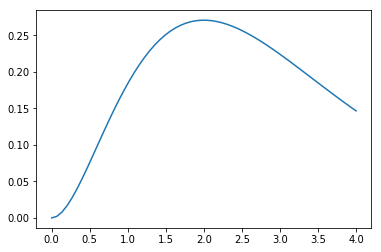

In [4]:
l = np.linspace(0.,4, 60)
likelihoodPois = LikePoisson(l,2)
plt.plot(l, likelihoodPois)

(array([ 3.,  5.,  5.,  8.,  9., 10.,  9.,  5.,  4.,  2.]),
 array([-6.65958261, -5.12188123, -3.58417985, -2.04647847, -0.50877709,
         1.02892428,  2.56662566,  4.10432704,  5.64202842,  7.1797298 ,
         8.71743118]),
 <a list of 10 Patch objects>)

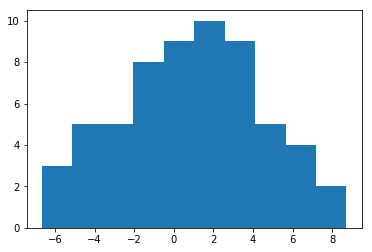

In [29]:
#Data = np.loadtxt('data/dataMLikelihood.dat')
#print(Data)
Data = np.random.normal(1, 4, 60)

plt.hist(Data)
#plt.plot(Data)

Objetivo: Encontrar el mejor valor de sigma dada la secuencia de datos observados {$x_{k}$} y la incertidumbre asociada:

$$ prob(\sigma|\{ x_{k}\}) \propto prob(\{ x_{k}\}|\sigma)prob(\sigma)$$

Asumimos la probabilidad de $P(\sigma) = A$, para $1 < \sigma < 10$ y cero en otro caso.

In [6]:
def probabilidad(x,sigma):
    return  ( 1./np.sqrt(2.* np.pi * sigma**2) )*np.exp( -0.5*(x/sigma)**2 )

In [32]:
def GetLikelihood(x, sigma):
    
    like = 1.0
    for i in x:
        like = like*probabilidad(i, sigma)
        
    like = -2.0*np.log(like)
    
    return like

In [33]:
xi, xf, Npoints = 1, 10, 1000
sigma = np.linspace(xi,xf,Npoints)
Likelihood = GetLikelihood(Data, sigma)
#print(Likelihood)

Text(0,0.5,'$L \\times {\\rm{prob}(\\sigma)}$')

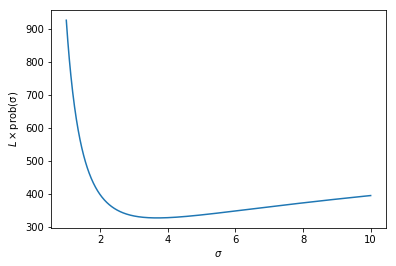

In [34]:
plt.figure()
plt.plot(sigma,Likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$L \times {\rm{prob}(\sigma)}$')
#plt.yscale('log')

In [35]:
def GetDerivative(x, sigma):
    h = 0.00001
    d = (GetLikelihood(x, sigma+h)-GetLikelihood(x, sigma-h))/(2.*h)
    return d

In [36]:
Dlikelihood = GetDerivative(Data, sigma)

Text(0,0.5,'$ dL/d\\sigma$')

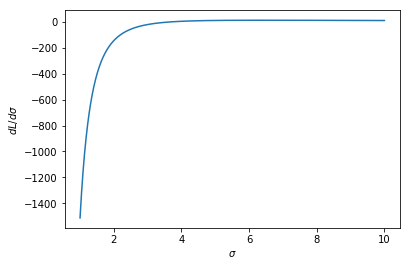

In [37]:
plt.figure()
plt.plot(sigma, Dlikelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$ dL/d\sigma$')

In [38]:
def Get2Derivative(x, sigma):
    h = 0.00001
    d = (GetDerivative(x, sigma+h)-GetDerivative(x, sigma-h))/(2.*h)
    return d

In [39]:
D2likelihood = Get2Derivative(Data, sigma)

Text(0,0.5,'$ d^{2}L/d\\sigma^{2}}$')

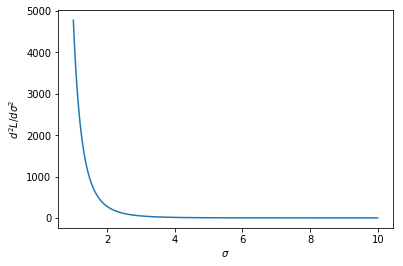

In [40]:
plt.figure()
plt.plot(sigma, D2likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$ d^{2}L/d\sigma^{2}}$')

El mejor valor de $\sigma$ dada la distribución de datos $\{x_{k}\}$, maximiza la función de Likelihood.
$$ \frac{dL}{d\sigma}\bigg|_{\sigma_{0}} = 0  $$ 

In [16]:
def NewtonRaphson(x, sigmai):
    precision = 1e-20
    sigman = sigmai
    #print(sigman, GetDerivative(x, sigman))
    while np.abs( GetDerivative(x, sigman) ) > precision:
        #print(sigman)
        sigman -= GetDerivative(x, sigman)/Get2Derivative(x, sigman)
    
    return sigman

In [41]:
SigmaValue = NewtonRaphson(Data, 4.0)
print(SigmaValue)

# anyway: issues with small numbers

3.6886692173547213


Para encontrar el error en la estimación usamos el valor maximo en la segunda derivada. No obstante, el likelihood debe estar normalizado correctamente.

$$ \Delta \sigma_{0} = -\frac{d^{2}L}{d\sigma^{2}}\bigg|_{\sigma_{0}} $$ 

In [18]:
test = -Get2Derivative(Data, SigmaValue)
print(test)

8.815211382369959e-13


In [21]:
def IntegrateLikelihood(x, sigma_min, sigma_max):
    # Trapecio
    Npoints = 1000
    s = np.linspace(sigma_min, sigma_max, Npoints)
    Likelihood = GetLikelihood(x, s)
    h = s[1]-s[0]
    w = np.ones(Npoints)*h
    w[0] = 0.5*h
    w[-1] = 0.5*h
    
    integral = np.sum(Likelihood*w)
    
    return integral

In [22]:
Normalization = IntegrateLikelihood(Data, 1.0, 10.)
print(Normalization)

1.7051343479160216e-12


In [25]:
# Error asociado a la estimación
DeltaSigma = -Get2Derivative(Data, SigmaValue)/Normalization
print(DeltaSigma)

0.5169804592314805


In [26]:
D2Likelihood = Get2Derivative(Data, sigma)/Normalization

Text(0,0.5,'$d^{2}L\\d \\sigma^{2}$')

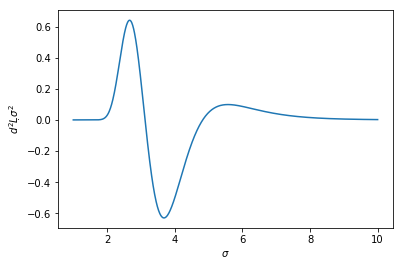

In [27]:
plt.figure()
plt.plot(sigma, D2Likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$d^{2}L\d \sigma^{2}$')